<a href="https://colab.research.google.com/github/Adharsh0001/Machine-Learning/blob/main/NLP_IMDB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the required packages

Getting the IMDB Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#df = pd.read_csv("/content/IMDB Dataset.csv")
df = pd.read_csv("https://raw.githubusercontent.com/Adharsh0001/NLP/main/IMDB%20Dataset_2.csv")
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


Getting the Frequency of Positve and Negative Sentiment to check whether its an Imbalanced Dataset

In [2]:
vc_df = pd.DataFrame(df["sentiment"].value_counts()).reset_index()
vc_df.columns = ["Sentiment","Count"]
vc_df["Sentiment"] = vc_df["Sentiment"].map({1:"positive",0:"negative"})
vc_df

,Sentiment,Count
0,NaN,5027
1,NaN,4972


In [3]:
df["review"]

0       One of the other reviewers has mentioned that ...
1       A wonderful little production. <br /><br />The...
2       I thought this was a wonderful way to spend ti...
3       Basically there's a family where a little boy ...
4       Petter Mattei's "Love in the Time of Money" is...
                              ...                        
9994    First off, this is the worst movie I've ever s...
9995    Fun, entertaining movie about WWII German spy ...
9996    Give me a break. How can anyone say that this ...
9997    This movie is a bad movie. But after watching ...
9998    This is a movie that was probably made to ente...
Name: review, Length: 9999, dtype: object

Punctuation removal

In [4]:
df["review_processed"] = df["review"].str.replace("[^a-zA-Z0-9]"," ")
#df = df[["review","review_processed","sentiment"]]

<ipython-input-4-05a503f5d2b3>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df["review_processed"] = df["review"].str.replace("[^a-zA-Z0-9]"," ")


In [5]:
df["review_processed"]

0       One of the other reviewers has mentioned that ...
1       A wonderful little production   br    br   The...
2       I thought this was a wonderful way to spend ti...
3       Basically there s a family where a little boy ...
4       Petter Mattei s  Love in the Time of Money  is...
                              ...                        
9994    First off  this is the worst movie I ve ever s...
9995    Fun  entertaining movie about WWII German spy ...
9996    Give me a break  How can anyone say that this ...
9997    This movie is a bad movie  But after watching ...
9998    This is a movie that was probably made to ente...
Name: review_processed, Length: 9999, dtype: object

Removing all words which has total length less than or equal to two

In [6]:
df["review_processed"] = df["review_processed"].apply(lambda row: " ".join([word for word in row.split() if len(word)>2]))
df["review_processed"]

0       One the other reviewers has mentioned that aft...
1       wonderful little production The filming techni...
2       thought this was wonderful way spend time too ...
3       Basically there family where little boy Jake t...
4       Petter Mattei Love the Time Money visually stu...
                              ...                        
9994    First off this the worst movie ever seen That ...
9995    Fun entertaining movie about WWII German spy J...
9996    Give break How can anyone say that this good h...
9997    This movie bad movie But after watching endles...
9998    This movie that was probably made entertain th...
Name: review_processed, Length: 9999, dtype: object

Converting all words to Small case words

In [7]:
df["review_processed"] = [review.lower() for review in df["review_processed"]]
df["review_processed"]

0       one the other reviewers has mentioned that aft...
1       wonderful little production the filming techni...
2       thought this was wonderful way spend time too ...
3       basically there family where little boy jake t...
4       petter mattei love the time money visually stu...
                              ...                        
9994    first off this the worst movie ever seen that ...
9995    fun entertaining movie about wwii german spy j...
9996    give break how can anyone say that this good h...
9997    this movie bad movie but after watching endles...
9998    this movie that was probably made entertain th...
Name: review_processed, Length: 9999, dtype: object

Remove stop word

In [21]:
import nltk
nltk.download("punkt")                        # for punctuation
nltk.download("wordnet")                      # for lemmatization
nltk.download("stopwords")                    # Coprus
nltk.download("averaged_perceptron_tagger")
from nltk.corpus import stopwords
from nltk import word_tokenize

stop_words = stopwords.words("english")
add_words = ["movie","film","one","make","even","like","see","say","movies","get","makes","making"]
stop_words.extend(add_words)
def remove_stopword(rev):
  review_tokenized = word_tokenize(rev)
  rev_new = " ".join([i for i in review_tokenized if i not in stop_words])
  return rev_new

df["review_processed"] = [remove_stopword(r) for r in df["review_processed"]]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [22]:
df["review_processed"]

0       reviewer mention watch episode hook right exac...
1       wonderful little production technique unassumi...
2       think wonderful way spend time hot summer week...
3       basically family little boy jake think zombie ...
4       petter mattei love time money visually stunnin...
                              ...                        
9994    first bad ever may want bad good way bore impl...
9995    fun entertain wwii german spy julie andrews fa...
9996    give break anyone good hockey know tend pretty...
9997    bad watch endless series bad horror little dif...
9998    probably entertain middle school early high sc...
Name: review_processed, Length: 9999, dtype: object

Lemmatize

In [23]:
nltk.download("wordnet")
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

lemmatizer = WordNetLemmatizer()

def nltk_tag_to_wordnet_tag(nltk_tag):
  if nltk_tag.startswith("J"):
    return wordnet.ADJ
  elif nltk_tag.startswith("V"):
    return wordnet.VERB
  elif nltk_tag.startswith("N"):
    return wordnet.NOUN
  elif nltk_tag.startswith("R"):
    return wordnet.ADV
  else:
    return None

def lemmatize_sentence(sentence):
  nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))
  wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])),nltk_tagged)
  lemmatized_sentence =[]
  for word,tag in wordnet_tagged:
    if tag is None:
      lemmatized_sentence.append(word)
    else:
      lemmatized_sentence.append(lemmatizer.lemmatize(word,tag))
  return " ".join(lemmatized_sentence)

df["review_processed"] = df["review_processed"].apply(lambda x:lemmatize_sentence(x))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [24]:
df["review_processed"]

0       reviewer mention watch episode hook right exac...
1       wonderful little production technique unassumi...
2       think wonderful way spend time hot summer week...
3       basically family little boy jake think zombie ...
4       petter mattei love time money visually stunnin...
                              ...                        
9994    first bad ever may want bad good way bore impl...
9995    fun entertain wwii german spy julie andrews fa...
9996    give break anyone good hockey know tend pretty...
9997    bad watch endless series bad horror little dif...
9998    probably entertain middle school early high sc...
Name: review_processed, Length: 9999, dtype: object

Visualize the data

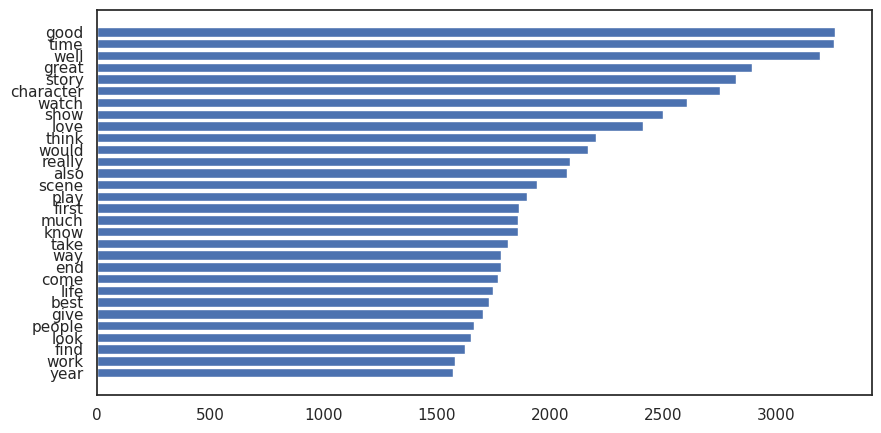

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = "white")
from nltk import FreqDist

all_words_df = df.loc[df["sentiment"]=="positive",:]
all_words = " ".join([text for text in all_words_df["review_processed"]])
all_words = all_words.split()
words_df = FreqDist(all_words)

words_df = pd.DataFrame({"word":list(words_df.keys()),"count":list(words_df.values())})
words_df
words_df = words_df.nlargest(columns = "count",n=30)

words_df.sort_values("count", inplace = True)
words_df
plt.figure(figsize = (10,5))
ax = plt.barh(words_df["word"], width =words_df["count"])
plt.show()

Word Cloud

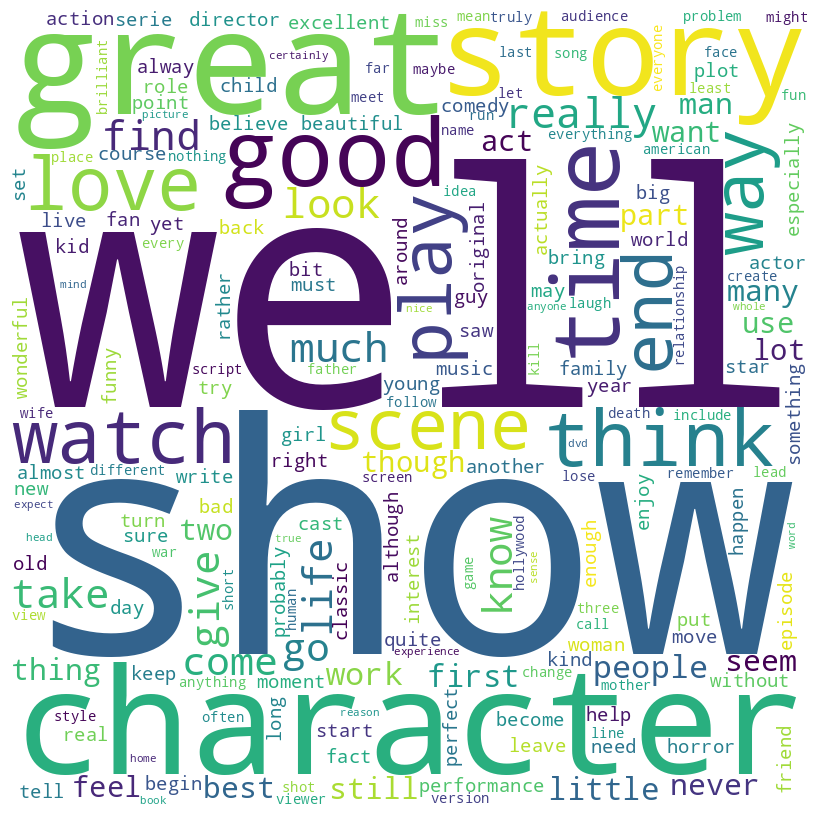

In [26]:
from wordcloud import WordCloud
word_cloud_df = df.loc[df["sentiment"]== "positive"]
all_words = " ".join([text for text in word_cloud_df["review_processed"]])

wordcloud = WordCloud(width = 800, height = 800,
                      background_color="white",
                      min_font_size = 10).generate(all_words)
plt.figure(figsize = (8,8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

Bag of Words Model

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf =  TfidfVectorizer(max_features = 2500)
tmp_df = tfidf.fit_transform(df.review_processed)
feature_names = tfidf.get_feature_names_out()
pd.DataFrame(tmp_df.toarray(),columns = feature_names).head()

X = tfidf.fit_transform(df.review_processed).toarray()
y = df.sentiment.map({"positive":1,"negative":0}).values
featureNames = tfidf.get_feature_names_out()

Splititng the dataset

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [20]:
X_train.shape, X_test.shape

((7999, 2500), (2000, 2500))

Applying Decision Tree

In [32]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

y_pred = dt.predict(X_test)
y_pred

array([1, 0, 0, ..., 0, 0, 0])

Getting the Confusion Matrix and Accuracy_Score

In [33]:
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test,y_pred)
print(cm)
print("The model accurayc is ", accuracy)

[[692 276]
 [306 726]]
The model accurayc is  0.709


Creating Confusion Matrix

<Axes: >

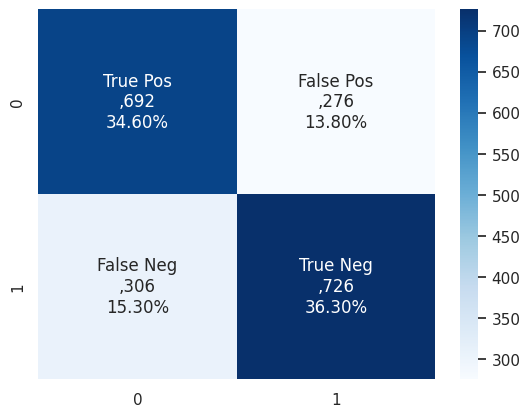

In [44]:
group_names = ["True Pos","False Pos", "False Neg", "True Neg"]
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages =["{0:.2%}". format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n,{v2}\n{v3}"for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)
labels
sns.heatmap(cm, annot = labels, fmt ="", cmap = "Blues")

Calculating the AUROC Score

In [45]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, dt.predict_proba(X_test)[:,1])

0.7091822025754372

Getting the Feature Importance

In [46]:
featureImportance = pd.DataFrame({i:j for i,j in zip(dt.feature_importances_,featureNames)}.items(),columns = ["Importance","word"])
featureImportance.sort_values(by="Importance",ascending = False)

,Importance,word
39,0.140056,bad
483,0.042411,waste
193,0.035035,great
38,0.018919,awful
148,0.016189,excellent
...,...,...
431,0.000321,success
36,0.000298,award
269,0.000267,maker
254,0.000249,larry
